In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# iImport Logging Libraries
import logging
logging.basicConfig(level= logging.INFO,
                    filename= 'app.log',
                    filemode= 'w',
                    format= '%(asctime)s - %(levelname)s - %(message)s', force= True

)

In [2]:
# Loading Dataset
url = 'https://raw.githubusercontent.com/mukeshmagar543/Energy_ConsumptionMLModel/refs/heads/main/train_energy_data.csv'

df = pd.read_csv(url)

df.sample(frac= 1) # Shuffle Dataset

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
734,Industrial,49768,51,22,34.91,Weekend,5763.85
829,Industrial,37301,38,35,20.22,Weekday,5393.95
457,Commercial,2250,11,4,22.11,Weekday,2241.96
435,Industrial,27089,69,25,29.33,Weekday,4947.78
946,Commercial,32696,19,37,24.33,Weekend,4443.15
...,...,...,...,...,...,...,...
227,Residential,4262,4,38,31.41,Weekday,2406.04
998,Residential,8348,67,37,16.48,Weekend,3244.98
26,Residential,35611,8,5,23.67,Weekend,3342.21
965,Commercial,20991,83,29,31.85,Weekend,4300.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [5]:
# Doing Univariate Analysis
from collections import OrderedDict

stats = []

for i in df.columns:
    if df[i].dtype != 'object':
        numerical_stats = OrderedDict ({
            'Feature' : i,
            'Minimum' : df[i].min(),
            'Maximum' : df[i].max(),
            'Mean' : df[i].mean(),
            'Median' : df[i].median(),
            '25%' : df[i].quantile(0.25),
            '75%' : df[i].quantile(0.75),
            'Kurtosis' : df[i].kurt(),
            "Skewness" : df[i].skew(),
            'Standard Deviation' : df[i].std()
        })

        stats.append(numerical_stats)
        report = pd.DataFrame(stats)

report

,Feature,Minimum,Maximum,Mean,Median,25%,75%,Kurtosis,Skewness,Standard Deviation
0,Square Footage,560.00,49997.00,25462.38800,25477.000,13169.7500,37446.25,-1.175406,0.009313,14294.554000
1,Number of Occupants,1.00,99.00,48.37200,47.000,22.0000,73.25,-1.241970,0.089302,29.061972
2,Appliances Used,1.00,49.00,25.60600,26.000,13.0000,38.00,-1.196605,-0.037392,14.105166
3,Average Temperature,10.05,34.99,22.61139,22.815,16.4750,28.85,-1.180404,-0.040406,7.139943
4,Energy Consumption,1683.95,6530.60,4166.25257,4175.730,3509.4825,4863.85,-0.575224,-0.046241,933.313064


In [ ]:
# Finding Null Values
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [13]:
df['Day of Week'].value_counts()

Day of Week
0    507
1    493
Name: count, dtype: int64

In [12]:
# Chenging categorical data into numerical by replacing 0 and 1
df['Day of Week'] = df['Day of Week'].replace({'Weekday' : 0, 'Weekend' : 1})

In [14]:
# Chenging categorical data into numerical by Label Encoding
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df['Building Type'] = le.fit_transform(df['Building Type'])

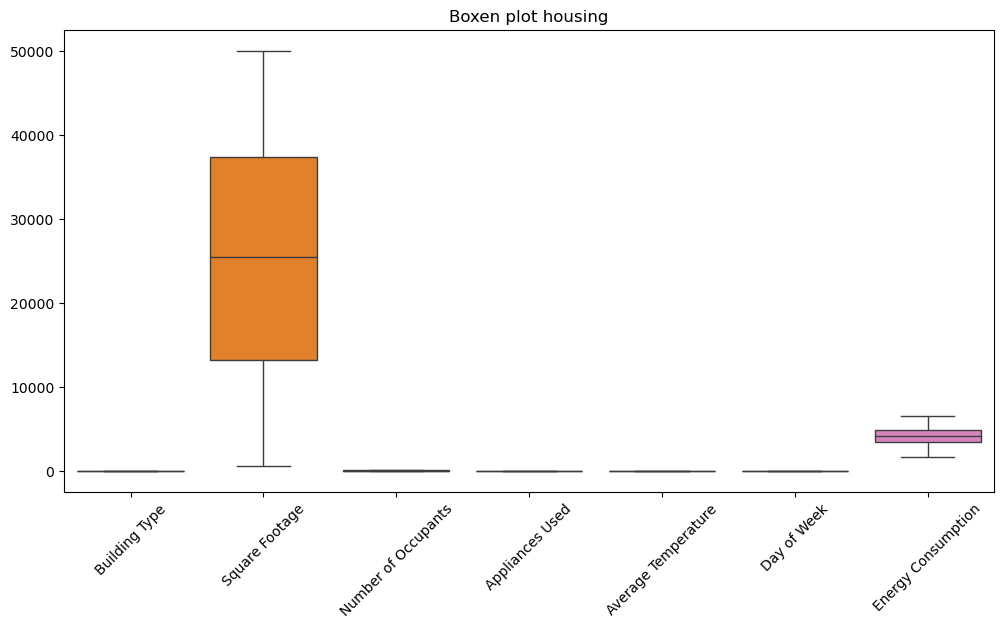

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxen plot housing')
plt.show()

In [17]:
# Splitting Data
X = df.drop(columns= 'Energy Consumption') 
y = df['Energy Consumption']  # Target Column

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20, random_state= 42)

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


# **Algorithms**

In [19]:
# Applying Linear Regression
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import r2_score

r2_score_LR = r2_score(y_test,y_pred_LR)

r2_score_LR

0.8451931910305854

In [20]:
# Applying Decision tree Regresssor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test,y_pred_DT)

r2_score_DT

0.9198704280095784

In [21]:
# Applying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test,y_pred_RF)

r2_score_RF

0.9768725684263677